# FIR Low Pass Filter Design

## Method 1: Using Impulse function derive analytically

Defining equation for impulse response of ideal LPF is
$$h(n) = {{sin(w_c n)} \over {\pi n}}$$
where  $wc=2 \pi f_n$ where $f_n$ is the normalized frequency $f_n= f_c/f_s$

If we use this equation directly we should take care of the division by zero case when n=0. Alternately we can use the np.sinc() function that takes care of this division by zero internally.

np.sinc(x) is defined as (see help(np.sinc) for more info) $$np.sinc(x) = {{sin(\pi x)} \over {\pi x}}$$

We can re-arrange h(n) as
$$h(n) = {2 f_n \over 2 f_n} {sin(2 \pi f_n n) \over {\pi n}}$$
rearranged to 
$$h(n) = 2 f_s . {sin(2 \pi f_n n) \over {2 f_n \pi n}}$$
As $\pi$ gets multiplied automatically by the np.sinc() function. This can be equivalenty written as
$$h(n) = 2 f_n . np.sinc(2 f_n n)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

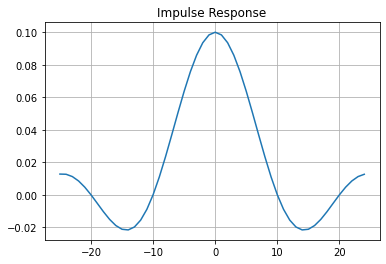

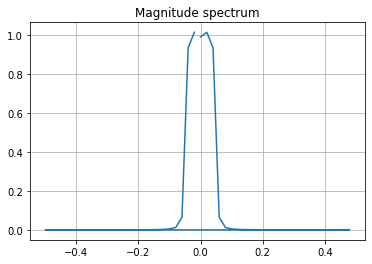

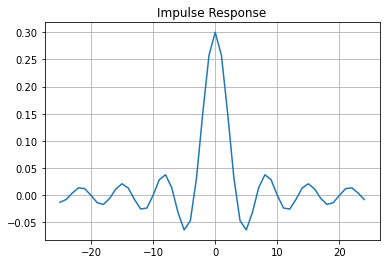

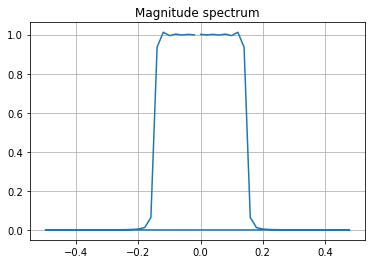

In [2]:


def lpf(fn, N, vis=False):
    n = np.arange(-N/2,N/2)
    hn = 2*fn*np.sinc(2*fn*n)
    if vis:
        plt.plot(n, hn)
        plt.title("Impulse Response")
        plt.grid()
        plt.show()
        Hf = np.fft.fft(hn)
        f = np.fft.fftfreq(hn.size, 1)
        plt.plot(f,np.abs(Hf))
        plt.grid()
        plt.title("Magnitude spectrum")
        plt.show()
    return hn

N=50
#wc=0.1pi => fn = 0.05
fn = 0.05
hn=lpf(fn, N, True)

#wc=0.3pi => fn = 0.15
hn=lpf(0.15,N, True)


## Method 2: Using desired frequency response

This is a very flexible method, in that same method can be used for Low-pass/ band-pass/band-stop/high-pass etc. Just that you should be able to draw the frequency response of the desired filter on paper.

* Step1: Draw the desired magnitude frequency response on a piece of paper (including the negative frequencies)
* Step2: Uniformly sample the frequency response into N samples. The output of this step will look like an array of zeros and ones like [0, 0, 0, 0, 1, 1, 1, 0, 0, 0] ; In this case N=10. Note that if N is even (N/2)+1th element is the DC component. If N is odd, N//2+1th element is the DC component. Your spectrum should be symmetrical about the DC component, otherwise you end up having imaginary component in the impulse response.
* Step3: Perform ifft to obtain the impulse response
Step4: Window this infinite impulse response using appropriate window function and use result as filter coefficients

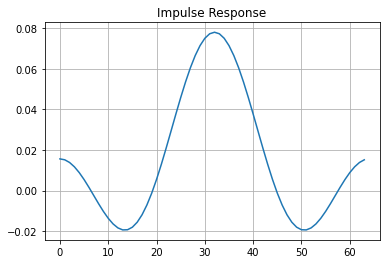

In [3]:
#for fn=1/16 ~ 0.05 => wc=0.1pi
def lpf2(vis=False):
    H=[
    0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,1,1,
    
    1,1,1,0,0,0,0,0,
    0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,
    ]
    h = np.fft.fftshift(np.fft.ifft(np.fft.fftshift(H))).real
    if vis:
        plt.plot(h)
        plt.title("Impulse Response")
        plt.grid()
        plt.show()
    return h
h=lpf2(True)

## Using the impulse responses for FIR filtering

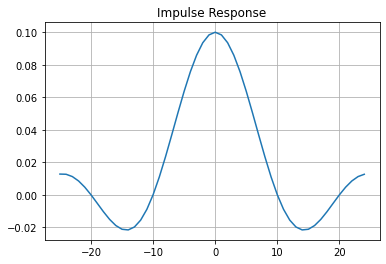

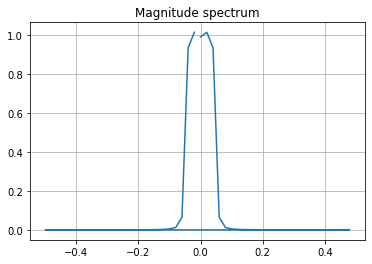

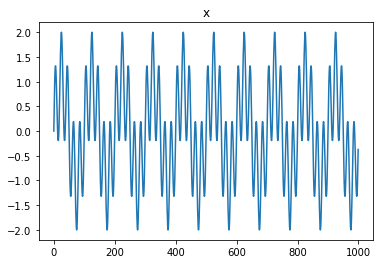

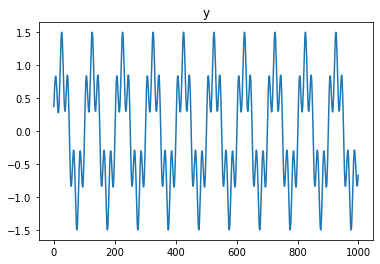

In [4]:
#Method1
N=50
#wc=0.1pi => fn = 0.05
fn = 0.05
h=lpf(fn, N, True)

h_fir = h * np.hamming(N)

t=np.arange(0, 1000)
f1 = 0.01
f2=0.05
f3=0.5
x=np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) + np.sin(2*np.pi*f3*t)
y = np.convolve(x,h_fir, 'same')

plt.plot(t,x)
plt.title("x")
plt.show()
plt.plot(t,y)
plt.title("y")
plt.show()

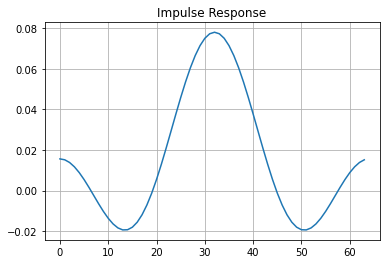

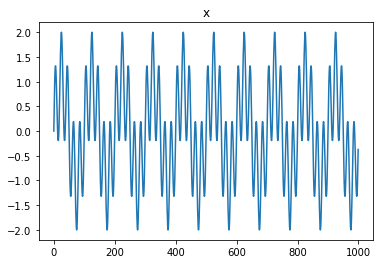

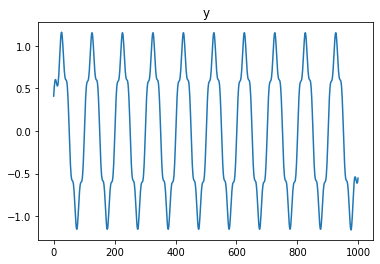

In [5]:
#Method2
h=lpf2(True)
N=len(h)
h_fir = h * np.hamming(N)

t=np.arange(0, 1000)
f1 = 0.01
f2=0.05
f3=0.5
x=np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) + np.sin(2*np.pi*f3*t)
y = np.convolve(x,h_fir, 'same')

plt.plot(t,x)
plt.title("x")
plt.show()
plt.plot(t,y)
plt.title("y")
plt.show()